In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random as rd
from sklearn.preprocessing import scale
from sklearn.svm import SVC     # classification algorithm 1: support vector machine
from sklearn.neighbors import KNeighborsClassifier     # classification algorithm 2: k-nearest neighbours
from sklearn.model_selection import train_test_split
from tqdm import tqdm # a smart progress metre for looping

### Import raw data from a CSV file and make data & labels


ImgDataFrame = pd.read_csv('Digit Recognizer/train.csv')

ImgDataFrame = ImgDataFrame.iloc[0:int(len(ImgDataFrame) / 2)] # reduce the size of raw dataset


labels = ImgDataFrame['label']
data = ImgDataFrame.iloc[:, 1:] # select columns except the first one

### Split raw data to training and validation sets

In [4]:
train_data, validation_data, train_labels, validation_labels = train_test_split(data, labels, train_size = 0.8, test_size = 0.2, random_state = 100)

## Selected Model: KNN Classifier

### Traverse a bunch of K's

In [6]:
accuracy_dict = {}
k_list = range(1, 20)
for k in k_list:
  knn_clf = KNeighborsClassifier(n_neighbors = k)
  knn_clf.fit(train_data, train_labels)
  accuracy_dict[k] = knn_clf.score(validation_data, validation_labels)
  print("Validation accuracy = %.3f" %knn_clf.score(validation_data, validation_labels))

k_for_AccuracyMax = max(accuracy_dict, key = accuracy_dict.get) 
print("When k = %d, we have the best validation accuracy ever!" %k_for_AccuracyMax)

Validation accuracy = 0.958
Validation accuracy = 0.954
Validation accuracy = 0.964
Validation accuracy = 0.963
Validation accuracy = 0.963
Validation accuracy = 0.960
Validation accuracy = 0.959
Validation accuracy = 0.959
Validation accuracy = 0.956
Validation accuracy = 0.955
Validation accuracy = 0.955
Validation accuracy = 0.953
Validation accuracy = 0.952
Validation accuracy = 0.950
Validation accuracy = 0.950
Validation accuracy = 0.948
Validation accuracy = 0.947
Validation accuracy = 0.948
Validation accuracy = 0.946
When k = 3, we have the best validation accuracy ever!


### Graph the accuracy results verse different K's

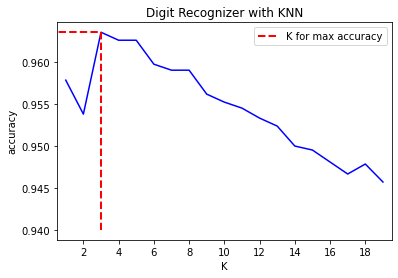

In [24]:
plt.plot(k_list, accuracy_dict.values(), color = 'blue')
plt.xlabel("K")
plt.ylabel("accuracy")
plt.plot([0, k_for_AccuracyMax, k_for_AccuracyMax], [max(accuracy_dict.values()), max(accuracy_dict.values()), 0.94], "r--", lw = 2, label = "K for max accuracy")
plt.title('Digit Recognizer with KNN')
plt.xticks([k for k in k_list if ( k % 2 ) == 0 ])
plt.xlim(0.5, 19.5)
plt.legend()
plt.show()

### Predict Testing Data

In [27]:
test_data = pd.read_csv('Digit Recognizer/test.csv')
predict_labels = knn_clf.predict(test_data)

In [29]:
idx_df = pd.DataFrame({'ImageId': range(1, len(test_data) + 1)}) # ImageId
predict_labels = pd.DataFrame({'Label': predict_labels})
print(type(predict_labels))
print(predict_labels.head())
predict_label_pixels = predict_labels.join(test_data) # Combine 2 dataframes as one!
ImgId_Labels = idx_df.join(predict_labels)

<class 'pandas.core.frame.DataFrame'>
   Label
0      2
1      0
2      9
3      4
4      3


### Visualise Testing Data and their Predicted Labels

[7777, 16478, 21127, 11523, 6035, 18176, 10653, 15849, 15363, 4043, 12863, 8397, 12616, 21214, 184, 14319]
7777
16478
21127
11523
6035
18176
10653
15849
15363
4043
12863
8397
12616
21214
184
14319


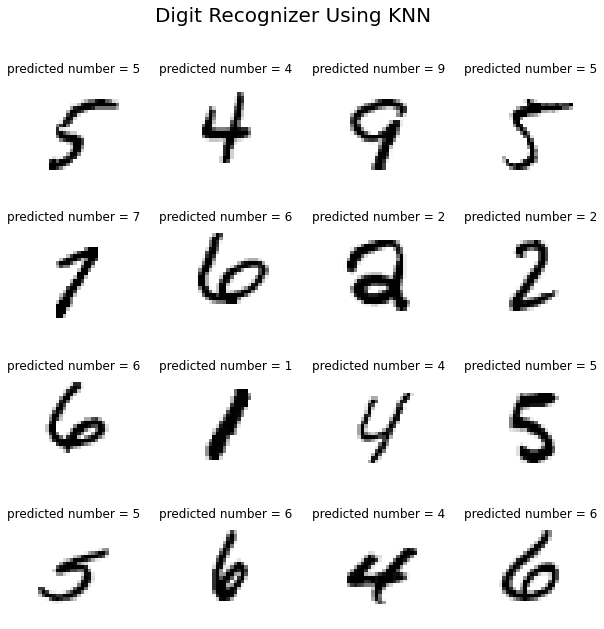

In [34]:
# pick N images from testing dataset at random
k = 4
N = k ** 2 
randIndices = []
for idx in range(N):
    randIndices.append(rd.randint(0, len(test_data)))

print(randIndices)

fig, ax = plt.subplots(k, k, sharex = False, sharey = False, figsize = (10, 10))
# sharex-> share the same x-axis or not  sharey->share the same y-axis or not

fig.subplots_adjust(wspace = .5, hspace = .5)
fig.suptitle('Digit Recognizer Using KNN', fontsize = 20)

for i in range(k):
    for j in range(k):
        randIdx = randIndices[i * k + j]
        print(randIdx)
        test_data_npArr = np.array(test_data.iloc[randIdx, :])
        ax[i][j].imshow(test_data_npArr.reshape(28,28), cmap = plt.cm.gray_r, interpolation = 'nearest')
        ax[i][j].set_title('predicted number = ' + str(predict_labels.iloc[randIdx]['Label']))
        ax[i][j].axis('off')

plt.show()

fig.savefig('Classificaiton Results with KNN.jpg')